In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd


In [4]:
file='/content/drive/MyDrive/Dataset/MONTHLY-WINTER.csv'

In [5]:
df = pd.read_csv(file)

In [6]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     134 non-null    object 
 1   MAX_AVG  134 non-null    float64
 2   MIN_AVG  134 non-null    float64
 3   RH_AVG   134 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.3+ KB


(None,
         YEAR   MAX_AVG   MIN_AVG    RH_AVG
 0   1/1/1981  25.11935  13.31290  70.15625
 1   1/2/1981  26.94800  15.41852  67.31034
 2  1/12/1981  25.52333  13.59032  71.15625
 3   1/1/1982  26.27097  12.25000  68.28125
 4   1/2/1982  27.28571  14.98929  62.75862)

In [7]:
# Convert YEAR column to datetime format
df["YEAR"] = pd.to_datetime(df["YEAR"], format="%d/%m/%Y")
# Set YEAR as index and sort by date
df = df.set_index("YEAR").sort_index()
# Display the first few rows after transformation
df.head()

,MAX_AVG,MIN_AVG,RH_AVG
YEAR,,,
1981-01-01,25.11935,13.31290,70.15625
1981-02-01,26.94800,15.41852,67.31034
1981-12-01,25.52333,13.59032,71.15625
1982-01-01,26.27097,12.25000,68.28125
1982-02-01,27.28571,14.98929,62.75862


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
X = df[["YEAR_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train models and store predictions
predictions = {}
future_years = pd.DataFrame({"YEAR_NUM": np.arange(2023, 2046)})  # Convert to DataFrame

for name, model in models.items():
    model.fit(X_train, y_max_train)
    predictions[f"{name}_MAX"] = model.predict(future_years)

    model.fit(X_train, y_min_train)
    predictions[f"{name}_MIN"] = model.predict(future_years)

    model.fit(X_train, y_rh_train)
    predictions[f"{name}_RH"] = model.predict(future_years)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years["YEAR_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Show first few rows of the forecast
print(forecast_df.head(600))

    YEAR  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  XGBoost_MAX  \
0   2023         26.527687         16.097439        67.821159     26.14983   
1   2024         26.527687         16.097439        67.821159     26.14983   
2   2025         26.527687         16.097439        67.821159     26.14983   
3   2026         26.527687         16.097439        67.821159     26.14983   
4   2027         26.527687         16.097439        67.821159     26.14983   
5   2028         26.527687         16.097439        67.821159     26.14983   
6   2029         26.527687         16.097439        67.821159     26.14983   
7   2030         26.527687         16.097439        67.821159     26.14983   
8   2031         26.527687         16.097439        67.821159     26.14983   
9   2032         26.527687         16.097439        67.821159     26.14983   
10  2033         26.527687         16.097439        67.821159     26.14983   
11  2034         26.527687         16.097439        67.821159   

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
X = df[["YEAR_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "ARIMA_MAX": ARIMA(y_max_train, order=(5, 1, 0)),
    "ARIMA_MIN": ARIMA(y_min_train, order=(5, 1, 0)),
    "ARIMA_RH": ARIMA(y_rh_train, order=(5, 1, 0)),
}

# Train models and store predictions
predictions = {}
future_years = pd.DataFrame({"YEAR_NUM": np.arange(2025, 2046)})  # Future years for prediction

for name, model in models.items():
    if name.startswith("ARIMA"):  # ARIMA is different because it does not use X_train
        if "MAX" in name:
            model_fit = model.fit()
            predictions[name] = model_fit.forecast(steps=len(future_years))
        elif "MIN" in name:
            model_fit = model.fit()
            predictions[name] = model_fit.forecast(steps=len(future_years))
        elif "RH" in name:
            model_fit = model.fit()
            predictions[name] = model_fit.forecast(steps=len(future_years))
    else:  # Other models (RandomForest, XGBoost, CatBoost, SVR)
        model.fit(X_train, y_max_train)
        predictions[f"{name}_MAX"] = model.predict(future_years)

        model.fit(X_train, y_min_train)
        predictions[f"{name}_MIN"] = model.predict(future_years)

        model.fit(X_train, y_rh_train)
        predictions[f"{name}_RH"] = model.predict(future_years)

# LSTM model (requires reshaping)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
y_max_train_lstm = y_max_train.values
y_min_train_lstm = y_min_train.values
y_rh_train_lstm = y_rh_train.values

# Create and train LSTM model for MAX
lstm_model_max = Sequential()
lstm_model_max.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model_max.add(LSTM(units=50))
lstm_model_max.add(Dense(units=1))
lstm_model_max.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_max.fit(X_train_lstm, y_max_train_lstm, epochs=10, batch_size=32)

# Create and train LSTM model for MIN
lstm_model_min = Sequential()
lstm_model_min.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model_min.add(LSTM(units=50))
lstm_model_min.add(Dense(units=1))
lstm_model_min.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_min.fit(X_train_lstm, y_min_train_lstm, epochs=10, batch_size=32)

# Create and train LSTM model for RH
lstm_model_rh = Sequential()
lstm_model_rh.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model_rh.add(LSTM(units=50))
lstm_model_rh.add(Dense(units=1))
lstm_model_rh.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_rh.fit(X_train_lstm, y_rh_train_lstm, epochs=10, batch_size=32)

# Make LSTM predictions for future years
future_years_lstm = future_years.values.reshape((future_years.shape[0], 1, future_years.shape[1]))

predictions['LSTM_MAX'] = lstm_model_max.predict(future_years_lstm)
predictions['LSTM_MIN'] = lstm_model_min.predict(future_years_lstm)
predictions['LSTM_RH'] = lstm_model_rh.predict(future_years_lstm)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years["YEAR_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Show first few rows of the forecast
print(forecast_df.head(23))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 719.1539
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 727.4380
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 706.5896 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 708.6346
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 718.4713 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 702.8813 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 692.0890
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 681.8774
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 671.0603 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 664.8796
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 262.4327
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 250.3576 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 253.4340 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 251.0913 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 242.8507 
Epoch 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

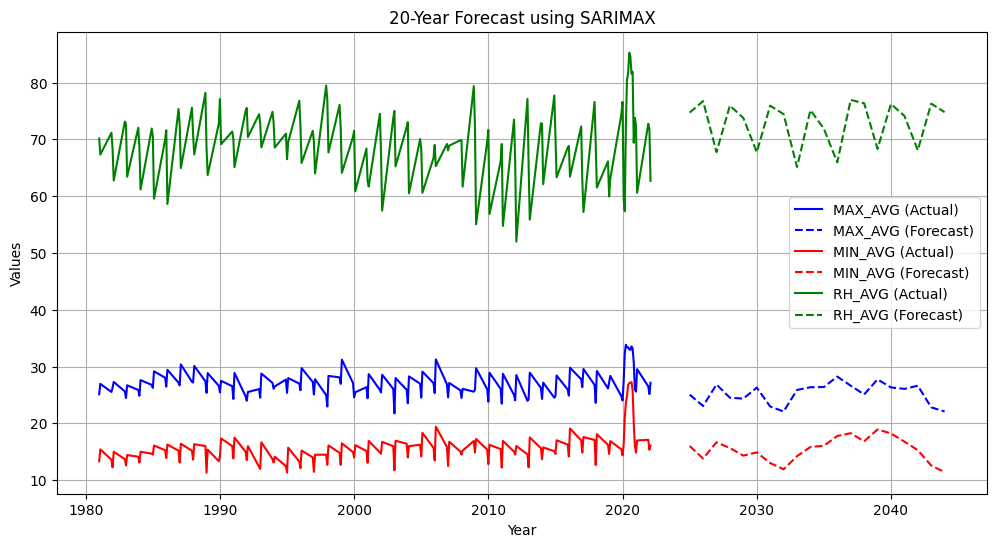

,MAX_AVG_PRED,MIN_AVG_PRED,RH_AVG_PRED
YEAR,,,
2025-01-01,25.041011,15.998964,74.704871
2026-01-01,23.053218,13.798297,76.734453
2027-01-01,26.841193,16.660318,67.731913
2028-01-01,24.505227,15.652852,75.947571
2029-01-01,24.353393,14.309667,73.752719
2030-01-01,26.291147,14.883345,67.734334
2031-01-01,22.957906,13.006551,75.930097
2032-01-01,22.077599,11.904900,74.439047
2033-01-01,25.881545,14.213496,65.128388


In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ভবিষ্যতের বছর নির্ধারণ (2025-2045)
future_years = pd.date_range(start="2025-01-01", periods=20, freq="YS")

# ARIMA & SARIMA মডেলের জন্য ফাংশন
def forecast_arima_sarima(series, model_type="SARIMA"):
    """
    ARIMA বা SARIMA মডেল ব্যবহার করে পূর্বাভাস তৈরি করা
    """
    # SARIMA (p, d, q) (P, D, Q, s) সেট করা
    if model_type == "SARIMA":
        model = sm.tsa.SARIMAX(series, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
    else:
        model = sm.tsa.ARIMA(series, order=(2, 1, 2))

    # মডেল ফিট করা
    fitted_model = model.fit()

    # ২০ বছরের পূর্বাভাস করা
    forecast = fitted_model.forecast(steps=20)

    return forecast

# তিনটি ভ্যারিয়েবলের জন্য পূর্বাভাস তৈরি
forecast_max = forecast_arima_sarima(df["MAX_AVG"], model_type="SARIMA")
forecast_min = forecast_arima_sarima(df["MIN_AVG"], model_type="SARIMA")
forecast_rh = forecast_arima_sarima(df["RH_AVG"], model_type="SARIMA")

# পূর্বাভাস ডেটাফ্রেম তৈরি করা
forecast_df = pd.DataFrame({"YEAR": future_years, "MAX_AVG_PRED": forecast_max.values, "MIN_AVG_PRED": forecast_min.values, "RH_AVG_PRED": forecast_rh.values})
forecast_df.set_index("YEAR", inplace=True)

# পূর্বাভাসের গ্রাফ আঁকা
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["MAX_AVG"], label="MAX_AVG (Actual)", color="blue")
plt.plot(forecast_df.index, forecast_df["MAX_AVG_PRED"], label="MAX_AVG (Forecast)", linestyle="dashed", color="blue")

plt.plot(df.index, df["MIN_AVG"], label="MIN_AVG (Actual)", color="red")
plt.plot(forecast_df.index, forecast_df["MIN_AVG_PRED"], label="MIN_AVG (Forecast)", linestyle="dashed", color="red")

plt.plot(df.index, df["RH_AVG"], label="RH_AVG (Actual)", color="green")
plt.plot(forecast_df.index, forecast_df["RH_AVG_PRED"], label="RH_AVG (Forecast)", linestyle="dashed", color="green")

plt.legend()
plt.title("20-Year Forecast using SARIMAX")
plt.xlabel("Year")
plt.ylabel("Values")
plt.grid()
plt.show()

# পূর্বাভাসের প্রথম কয়েকটি লাইন দেখা
forecast_df.head(24)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

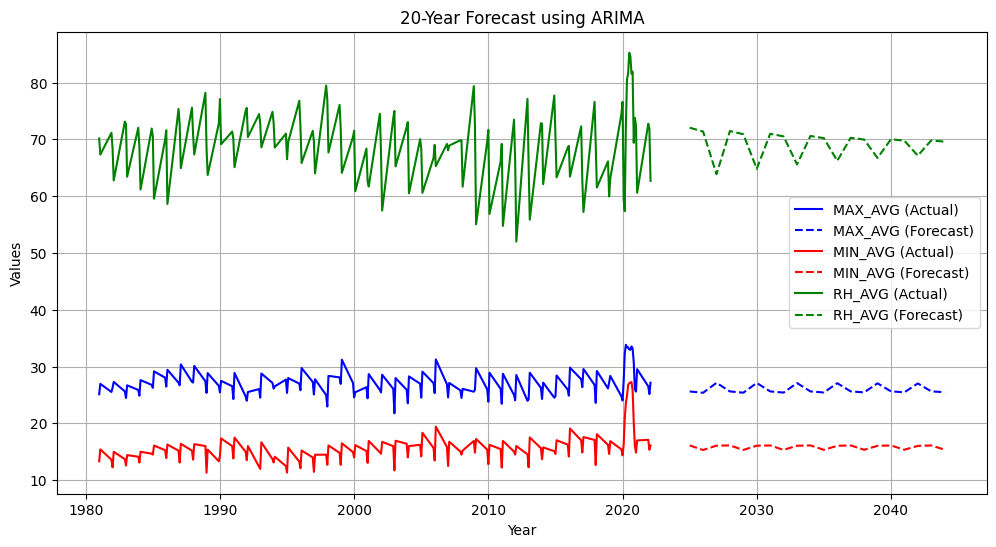

,MAX_AVG_PRED,MIN_AVG_PRED,RH_AVG_PRED
YEAR,,,
2025-01-01,25.612494,16.112191,72.047370
2026-01-01,25.376470,15.302264,71.373579
2027-01-01,27.128578,16.072325,63.863310
2028-01-01,25.614879,16.111294,71.459392
2029-01-01,25.395226,15.312836,70.901572
2030-01-01,27.107528,16.062771,64.815291
2031-01-01,25.617359,16.110294,70.981363
2032-01-01,25.413521,15.323253,70.519743
2033-01-01,27.086844,16.053473,65.587469


In [29]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# ভবিষ্যতের বছর নির্ধারণ (2025-2045)
future_years = pd.date_range(start="2025-01-01", periods=20, freq="YS")

# ARIMA মডেলের জন্য ফাংশন
def forecast_arima(series):
    """
    ARIMA মডেল ব্যবহার করে পূর্বাভাস তৈরি করা
    """
    # ARIMA (p, d, q) সেট করা
    model = sm.tsa.ARIMA(series, order=(2, 1, 2))  # ARIMA model setup with (p=2, d=1, q=2)

    # মডেল ফিট করা
    fitted_model = model.fit()

    # ২০ বছরের পূর্বাভাস করা
    forecast = fitted_model.forecast(steps=20)

    return forecast

# তিনটি ভ্যারিয়েবলের জন্য পূর্বাভাস তৈরি
forecast_max = forecast_arima(df["MAX_AVG"])  # ARIMA ব্যবহার করছি
forecast_min = forecast_arima(df["MIN_AVG"])  # ARIMA ব্যবহার করছি
forecast_rh = forecast_arima(df["RH_AVG"])  # ARIMA ব্যবহার করছি

# পূর্বাভাস ডেটাফ্রেম তৈরি করা
forecast_df = pd.DataFrame({"YEAR": future_years, "MAX_AVG_PRED": forecast_max, "MIN_AVG_PRED": forecast_min, "RH_AVG_PRED": forecast_rh})
forecast_df.set_index("YEAR", inplace=True)

# পূর্বাভাসের গ্রাফ আঁকা
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["MAX_AVG"], label="MAX_AVG (Actual)", color="blue")
plt.plot(forecast_df.index, forecast_df["MAX_AVG_PRED"], label="MAX_AVG (Forecast)", linestyle="dashed", color="blue")

plt.plot(df.index, df["MIN_AVG"], label="MIN_AVG (Actual)", color="red")
plt.plot(forecast_df.index, forecast_df["MIN_AVG_PRED"], label="MIN_AVG (Forecast)", linestyle="dashed", color="red")

plt.plot(df.index, df["RH_AVG"], label="RH_AVG (Actual)", color="green")
plt.plot(forecast_df.index, forecast_df["RH_AVG_PRED"], label="RH_AVG (Forecast)", linestyle="dashed", color="green")

plt.legend()
plt.title("20-Year Forecast using ARIMA")
plt.xlabel("Year")
plt.ylabel("Values")
plt.grid()
plt.show()

# পূর্বাভাসের প্রথম কয়েকটি লাইন দেখা
forecast_df.head(24)



In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
df["MONTH_NUM"] = df.index.month  # Extract numerical month
X = df[["YEAR_NUM", "MONTH_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train models and store predictions
predictions = {}
future_years_months = pd.DataFrame({
    "YEAR_NUM": np.tile(np.arange(2023, 2046), 3),  # Repeating years for the 3 months
    "MONTH_NUM": np.tile([1, 2, 12], len(np.arange(2023, 2046)))  # Only Jan (1), Feb (2), and Dec (12)
})

for name, model in models.items():
    model.fit(X_train, y_max_train)
    predictions[f"{name}_MAX"] = model.predict(future_years_months)

    model.fit(X_train, y_min_train)
    predictions[f"{name}_MIN"] = model.predict(future_years_months)

    model.fit(X_train, y_rh_train)
    predictions[f"{name}_RH"] = model.predict(future_years_months)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years_months["YEAR_NUM"], "MONTH": future_years_months["MONTH_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Show first few rows of the forecast for Jan, Feb, Dec
print(forecast_df.head(600))


    YEAR  MONTH  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  \
0   2023      1         25.390222         15.293305        71.716562   
1   2024      2         27.780628         16.173627        62.071495   
2   2025     12         27.221140         18.093072        73.710544   
3   2026      1         25.390222         15.293305        71.716562   
4   2027      2         27.780628         16.173627        62.071495   
..   ...    ...               ...               ...              ...   
64  2041      2         27.780628         16.173627        62.071495   
65  2042     12         27.221140         18.093072        73.710544   
66  2043      1         25.390222         15.293305        71.716562   
67  2044      2         27.780628         16.173627        62.071495   
68  2045     12         27.221140         18.093072        73.710544   

    XGBoost_MAX  XGBoost_MIN  XGBoost_RH  
0     25.147543    15.338550   71.849434  
1     27.149137    16.083075   62.677246  
2     

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
df["MONTH_NUM"] = df.index.month  # Extract numerical month
X = df[["YEAR_NUM", "MONTH_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train models and store predictions
predictions = {}
future_years_months = pd.DataFrame({
    "YEAR_NUM": np.tile(np.arange(2023, 2046), 3),  # Repeating years for the 3 months
    "MONTH_NUM": np.tile([1, 2, 12], len(np.arange(2023, 2046)))  # Only Jan (1), Feb (2), and Dec (12)
})

for name, model in models.items():
    model.fit(X_train, y_max_train)
    predictions[f"{name}_MAX"] = model.predict(future_years_months)

    model.fit(X_train, y_min_train)
    predictions[f"{name}_MIN"] = model.predict(future_years_months)

    model.fit(X_train, y_rh_train)
    predictions[f"{name}_RH"] = model.predict(future_years_months)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years_months["YEAR_NUM"], "MONTH": future_years_months["MONTH_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Show first few rows of the forecast for Jan, Feb, Dec
print(forecast_df)


    YEAR  MONTH  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  \
0   2023      1         25.390222         15.293305        71.716562   
1   2024      2         27.780628         16.173627        62.071495   
2   2025     12         27.221140         18.093072        73.710544   
3   2026      1         25.390222         15.293305        71.716562   
4   2027      2         27.780628         16.173627        62.071495   
..   ...    ...               ...               ...              ...   
64  2041      2         27.780628         16.173627        62.071495   
65  2042     12         27.221140         18.093072        73.710544   
66  2043      1         25.390222         15.293305        71.716562   
67  2044      2         27.780628         16.173627        62.071495   
68  2045     12         27.221140         18.093072        73.710544   

    XGBoost_MAX  XGBoost_MIN  XGBoost_RH  
0     25.147543    15.338550   71.849434  
1     27.149137    16.083075   62.677246  
2     

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
df["MONTH_NUM"] = df.index.month  # Extract numerical month
X = df[["YEAR_NUM", "MONTH_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train models and store predictions
predictions = {}
future_years_months = pd.DataFrame({
    "YEAR_NUM": np.tile(np.arange(2023, 2046), 3),  # Repeating years for the 3 months
    "MONTH_NUM": np.tile([1, 2, 12], len(np.arange(2023, 2046)))  # Only Jan (1), Feb (2), and Dec (12)
})

for name, model in models.items():
    model.fit(X_train, y_max_train)
    predictions[f"{name}_MAX"] = model.predict(future_years_months)

    model.fit(X_train, y_min_train)
    predictions[f"{name}_MIN"] = model.predict(future_years_months)

    model.fit(X_train, y_rh_train)
    predictions[f"{name}_RH"] = model.predict(future_years_months)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years_months["YEAR_NUM"], "MONTH": future_years_months["MONTH_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Show the complete forecast data for Jan, Feb, and Dec (all years)
print(forecast_df)


    YEAR  MONTH  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  \
0   2023      1         25.390222         15.293305        71.716562   
1   2024      2         27.780628         16.173627        62.071495   
2   2025     12         27.221140         18.093072        73.710544   
3   2026      1         25.390222         15.293305        71.716562   
4   2027      2         27.780628         16.173627        62.071495   
..   ...    ...               ...               ...              ...   
64  2041      2         27.780628         16.173627        62.071495   
65  2042     12         27.221140         18.093072        73.710544   
66  2043      1         25.390222         15.293305        71.716562   
67  2044      2         27.780628         16.173627        62.071495   
68  2045     12         27.221140         18.093072        73.710544   

    XGBoost_MAX  XGBoost_MIN  XGBoost_RH  
0     25.147543    15.338550   71.849434  
1     27.149137    16.083075   62.677246  
2     

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
df["MONTH_NUM"] = df.index.month  # Extract numerical month
X = df[["YEAR_NUM", "MONTH_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train models and store predictions
predictions = {}
future_years_months = pd.DataFrame({
    "YEAR_NUM": np.tile(np.arange(2023, 2046), 3),  # Repeating years for the 3 months
    "MONTH_NUM": np.tile([1, 2, 12], len(np.arange(2023, 2046)))  # Only Jan (1), Feb (2), and Dec (12)
})

for name, model in models.items():
    model.fit(X_train, y_max_train)
    predictions[f"{name}_MAX"] = model.predict(future_years_months)

    model.fit(X_train, y_min_train)
    predictions[f"{name}_MIN"] = model.predict(future_years_months)

    model.fit(X_train, y_rh_train)
    predictions[f"{name}_RH"] = model.predict(future_years_months)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years_months["YEAR_NUM"], "MONTH": future_years_months["MONTH_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Display forecast for each year from 2023 to 2045, for Jan, Feb, and Dec
forecast_df = forecast_df[forecast_df["YEAR"].between(2023, 2045)]  # Filtering for 2023 to 2045
forecast_df = forecast_df.sort_values(by=["YEAR", "MONTH"])  # Sorting by year and month

# Display the forecasted values in a neat format
print(forecast_df)


    YEAR  MONTH  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  \
0   2023      1         25.390222         15.293305        71.716562   
46  2023      2         27.780628         16.173627        62.071495   
23  2023     12         27.221140         18.093072        73.710544   
24  2024      1         25.390222         15.293305        71.716562   
1   2024      2         27.780628         16.173627        62.071495   
..   ...    ...               ...               ...              ...   
67  2044      2         27.780628         16.173627        62.071495   
44  2044     12         27.221140         18.093072        73.710544   
45  2045      1         25.390222         15.293305        71.716562   
22  2045      2         27.780628         16.173627        62.071495   
68  2045     12         27.221140         18.093072        73.710544   

    XGBoost_MAX  XGBoost_MIN  XGBoost_RH  
0     25.147543    15.338550   71.849434  
46    27.149137    16.083075   62.677246  
23    

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the dataset for modeling
df["YEAR_NUM"] = df.index.year  # Extract numerical year
df["MONTH_NUM"] = df.index.month  # Extract numerical month
X = df[["YEAR_NUM", "MONTH_NUM"]]
y_max = df["MAX_AVG"]
y_min = df["MIN_AVG"]
y_rh = df["RH_AVG"]

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_rh_train, y_rh_test = train_test_split(X, y_rh, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train models and store predictions
predictions = {}
future_years_months = pd.DataFrame({
    "YEAR_NUM": np.tile(np.arange(2023, 2046), 3),  # Repeating years for the 3 months
    "MONTH_NUM": np.tile([1, 2, 12], len(np.arange(2023, 2046)))  # Only Jan (1), Feb (2), and Dec (12)
})

# Function to create and fit an ARIMA model
def fit_arima(y_train):
    model = ARIMA(y_train, order=(5, 1, 0))  # You can modify the order if needed
    model_fit = model.fit()
    return model_fit

# Function to create and fit a SARIMAX model
def fit_sarimax(y_train):
    model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Seasonal ARIMA
    model_fit = model.fit(disp=False)
    return model_fit

# Function to create and fit SVR model
def fit_svr(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    svr = SVR(kernel='rbf')
    svr.fit(X_train_scaled, y_train)
    return svr, scaler

# Function to create and fit LSTM model
def fit_lstm(X_train, y_train):
    # Reshaping for LSTM (samples, time steps, features)
    X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(units=1))  # Prediction output
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
    return model

# Train and predict for each model
for name, model in models.items():
    # RandomForest and XGBoost predictions for MAX, MIN, and RH
    model.fit(X_train, y_max_train)
    predictions[f"{name}_MAX"] = model.predict(future_years_months)

    model.fit(X_train, y_min_train)
    predictions[f"{name}_MIN"] = model.predict(future_years_months)

    model.fit(X_train, y_rh_train)
    predictions[f"{name}_RH"] = model.predict(future_years_months)

# ARIMA, SARIMAX, SVR, and LSTM predictions for MAX, MIN, and RH
# ARIMA
arima_max = fit_arima(y_max_train)
predictions["ARIMA_MAX"] = arima_max.forecast(steps=len(future_years_months))

arima_min = fit_arima(y_min_train)
predictions["ARIMA_MIN"] = arima_min.forecast(steps=len(future_years_months))

arima_rh = fit_arima(y_rh_train)
predictions["ARIMA_RH"] = arima_rh.forecast(steps=len(future_years_months))

# SARIMAX
sarimax_max = fit_sarimax(y_max_train)
predictions["SARIMAX_MAX"] = sarimax_max.forecast(steps=len(future_years_months))

sarimax_min = fit_sarimax(y_min_train)
predictions["SARIMAX_MIN"] = sarimax_min.forecast(steps=len(future_years_months))

sarimax_rh = fit_sarimax(y_rh_train)
predictions["SARIMAX_RH"] = sarimax_rh.forecast(steps=len(future_years_months))

# SVR
svr_max, scaler_max = fit_svr(X_train, y_max_train)
X_future_scaled = scaler_max.transform(future_years_months[["YEAR_NUM", "MONTH_NUM"]])
predictions["SVR_MAX"] = svr_max.predict(X_future_scaled)

svr_min, scaler_min = fit_svr(X_train, y_min_train)
X_future_scaled = scaler_min.transform(future_years_months[["YEAR_NUM", "MONTH_NUM"]])
predictions["SVR_MIN"] = svr_min.predict(X_future_scaled)

svr_rh, scaler_rh = fit_svr(X_train, y_rh_train)
X_future_scaled = scaler_rh.transform(future_years_months[["YEAR_NUM", "MONTH_NUM"]])
predictions["SVR_RH"] = svr_rh.predict(X_future_scaled)

# LSTM
lstm_max = fit_lstm(X_train, y_max_train)
X_future_lstm = future_years_months[["YEAR_NUM", "MONTH_NUM"]].values.reshape(-1, 1, 2)
predictions["LSTM_MAX"] = lstm_max.predict(X_future_lstm)

lstm_min = fit_lstm(X_train, y_min_train)
predictions["LSTM_MIN"] = lstm_min.predict(X_future_lstm)

lstm_rh = fit_lstm(X_train, y_rh_train)
predictions["LSTM_RH"] = lstm_rh.predict(X_future_lstm)

# Create forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years_months["YEAR_NUM"], "MONTH": future_years_months["MONTH_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Display the complete forecast data for Jan, Feb, and Dec (all years)
forecast_df = forecast_df[forecast_df["YEAR"].between(2023, 2045)]  # Filtering for 2023 to 2045
forecast_df = forecast_df.sort_values(by=["YEAR", "MONTH"])  # Sorting by year and month

# Display the forecasted values
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
    YEAR  MONTH  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  \
0   2023      1         25.390222         15.293305        71.716562   
46  2023      2         27.780628         16.173627        62.071495   
23  2023     12         27.221140         18.093072        73.710544   
24  2024      1         25.390222         15.293305        71.716562   
1   2024      2         27.780628         16.173627        62.071495   
..   ...    ...               ...               ...              ...   
67  2044      2         27.780628         16.173627        62.071495   
44  2044     12         27.221140         18.093072        73.710544   
45  2045      1         25.390222         15.293305        71.716562   
22  2045      2         27.780628         16.173627        62.071495   
68  2045     12         27.221140         18.093072        73.710544   

    XGBoost_MAX  XGBoost_MIN  XGBoost_RH  ARIMA_MAX  ARIMA_MIN  ARIMA_RH  \
0     25.147543    15

In [39]:
df = df.dropna()  # Drop rows with NaN values
# Or you can fill NaN with the mean, median, or any other imputation technique
df = df.fillna(df.mean())


In [41]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using the Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Data is not stationary. Differencing will be applied.")
        return False
    else:
        print("Data is stationary.")
        return True

# Check stationarity for MAX, MIN, RH columns
check_stationarity(df['MAX_AVG'])
check_stationarity(df['MIN_AVG'])
check_stationarity(df['RH_AVG'])


ADF Statistic: -3.834302295071071
p-value: 0.0025752239294975165
Data is stationary.
ADF Statistic: -1.5424200109011288
p-value: 0.5124322353989608
Data is not stationary. Differencing will be applied.
ADF Statistic: -3.827736029870077
p-value: 0.0026359515877315064
Data is stationary.


True

In [42]:
df['MAX_AVG'] = df['MAX_AVG'].diff().dropna()
df['MIN_AVG'] = df['MIN_AVG'].diff().dropna()
df['RH_AVG'] = df['RH_AVG'].diff().dropna()


In [43]:
# Fill missing values or drop them
df = df.fillna(method='ffill')  # Forward-fill missing values
# or
df = df.dropna()  # Drop rows with missing values


<ipython-input-43-351b68aea3bd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward-fill missing values


In [44]:
# For ARIMA, start with a simple model (p=1, d=1, q=1) and adjust
model_arima_max = ARIMA(df['MAX_AVG'], order=(1, 1, 1))
model_fit_max = model_arima_max.fit()

# Forecast with ARIMA model
forecast_arima_max = model_fit_max.forecast(steps=len(future_years_months))

# For SARIMAX, use reasonable seasonal orders
model_sarimax_max = SARIMAX(df['MAX_AVG'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarimax_max = model_sarimax_max.fit(disp=False)

# Forecast with SARIMAX model
forecast_sarimax_max = model_fit_sarimax_max.forecast(steps=len(future_years_months))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Handling NaN values
df = df.fillna(df.mean())  # Fill NaN values with mean for simplicity

# Ensuring data is stationary
df['MAX_AVG'] = df['MAX_AVG'].diff().dropna()
df['MIN_AVG'] = df['MIN_AVG'].diff().dropna()
df['RH_AVG'] = df['RH_AVG'].diff().dropna()

# ARIMA model
def fit_arima(y_train):
    model = ARIMA(y_train, order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()
    return model_fit

# SARIMAX model
def fit_sarimax(y_train):
    model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit(disp=False)
    return model_fit

# ARIMA predictions
arima_max = fit_arima(df['MAX_AVG'])
predictions["ARIMA_MAX"] = arima_max.forecast(steps=len(future_years_months))

arima_min = fit_arima(df['MIN_AVG'])
predictions["ARIMA_MIN"] = arima_min.forecast(steps=len(future_years_months))

arima_rh = fit_arima(df['RH_AVG'])
predictions["ARIMA_RH"] = arima_rh.forecast(steps=len(future_years_months))

# SARIMAX predictions
sarimax_max = fit_sarimax(df['MAX_AVG'])
predictions["SARIMAX_MAX"] = sarimax_max.forecast(steps=len(future_years_months))

sarimax_min = fit_sarimax(df['MIN_AVG'])
predictions["SARIMAX_MIN"] = sarimax_min.forecast(steps=len(future_years_months))

sarimax_rh = fit_sarimax(df['RH_AVG'])
predictions["SARIMAX_RH"] = sarimax_rh.forecast(steps=len(future_years_months))

# Final forecast DataFrame
forecast_df = pd.DataFrame({"YEAR": future_years_months["YEAR_NUM"], "MONTH": future_years_months["MONTH_NUM"]})
for key, values in predictions.items():
    forecast_df[key] = values

# Display the forecasted values
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

    YEAR  MONTH  RandomForest_MAX  RandomForest_MIN  RandomForest_RH  \
0   2023      1         25.390222         15.293305        71.716562   
1   2024      2         27.780628         16.173627        62.071495   
2   2025     12         27.221140         18.093072        73.710544   
3   2026      1         25.390222         15.293305        71.716562   
4   2027      2         27.780628         16.173627        62.071495   
..   ...    ...               ...               ...              ...   
64  2041      2         27.780628         16.173627        62.071495   
65  2042     12         27.221140         18.093072        73.710544   
66  2043      1         25.390222         15.293305        71.716562   
67  2044      2         27.780628         16.173627        62.071495   
68  2045     12         27.221140         18.093072        73.710544   

    XGBoost_MAX  XGBoost_MIN  XGBoost_RH  ARIMA_MAX  ARIMA_MIN  ARIMA_RH  \
0     25.147543    15.338550   71.849434        NaN        

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
!pip install statsmodels


In [47]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
